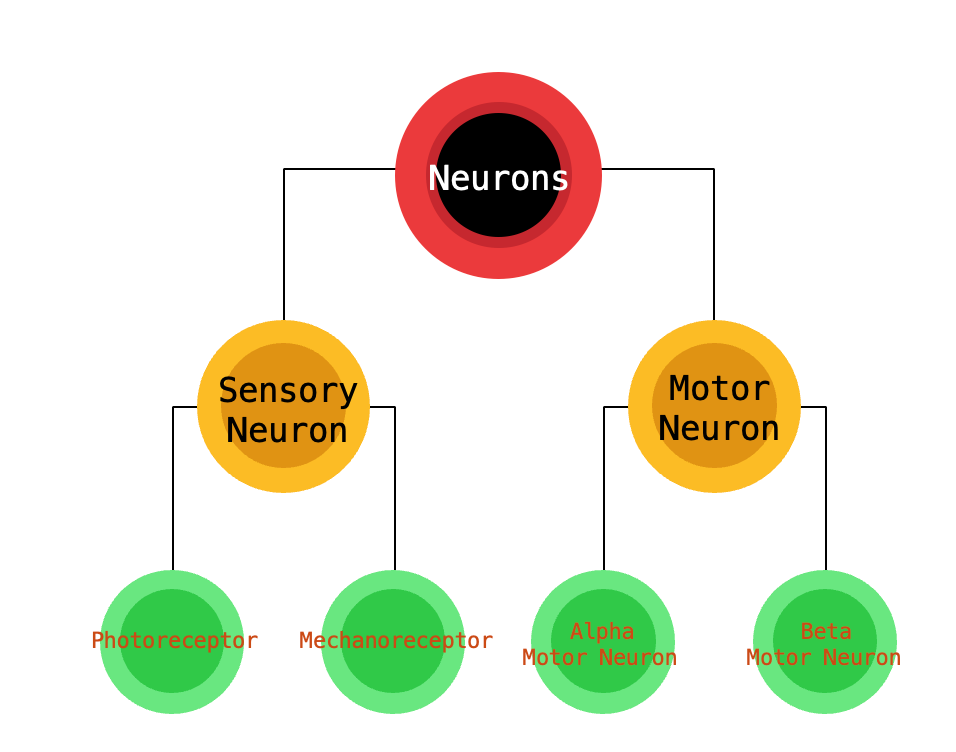

In [ ]:
# Base class
class Neurons: 
    # Base attributes
    def __init__(self, firing_rate):
        self.firing_rate = firing_rate
    # Base method
    def activate(self, strength):
        self.firing_rate = self.firing_rate * strength
        return self.firing_rate
# Intermidiate Class 
class Sensory_Neuron(Neurons):  # noqa: D101, N801
    def __init__(self, firing_rate, receptor_type):
        # Inherit base attributes
        super().__init__(firing_rate)
        # Add intermidiate attribute
        self.receptor_type = receptor_type
    # Add intermidiate method
    def Sense_stimulus(self, stim_type, strength): 
        if (stim_type == self.receptor_type):
            # Use base method
            self.activate(strength)
# Intermidiate Class             
class Motor_Neuron(Neurons): 
    def __init__(self, firing_rate, target_muscle): 
        # Inherit base attributes      
        super().__init__(firing_rate)
        # Add intermidiate attribute
        self.target_muscle = target_muscle
    # Add intermidiate method
    def control_muscle(self,act_lvl): 
        print("moving %s in %d power", self.target_muscle, act_lvl*self.firing_rate)
# Leaf class
class Photoreceptor(Sensory_Neuron): 
    def __init__(self, firing_rate):
        # Inherit all intermidate attributes, predifine receptor type
        super().__init__(firing_rate, receptor_type = "Light")
    # Override intermidate method and replace it with uniqe method
    def Sense_stimulus(self, light_strength): 
        self.activate(light_strength)
# Leaf class
class Mechanoreceptor(Sensory_Neuron): 
    def __init__(self, firing_rate):
        # Inherit all intermidate attributes, predifine receptor type
        super().__init__(firing_rate, receptor_type = "Pressure")
    # Override intermidate method and replace it with uniqe method        
    def Sense_stimulus(self, Pressure_strength): 
        self.activate(Pressure_strength)
# Leaf class
class Alpha_Motor_Neuron(Motor_Neuron):
    def __init__(self, firing_rate):
        # Inherit all intermidate attributes, predifine receptor type
        super().__init__(firing_rate, target_muscle = "Skeletal muscle")
    # Override intermidate method and replace it with uniqe method                
    def control_muscle(self,act_lvl): 
        print("moving %s in %d power. in a rapid manner fitting a skeletal muscle", self.target_muscle, act_lvl*self.firing_rate*3)
# Leaf class
class Gamma_Motor_Neuron(Motor_Neuron): 
        # Inherit all intermidate attributes, predifine receptor type
    def __init__(self, firing_rate):
        super().__init__(firing_rate, target_muscle = "muscle spindle")
    # Override intermidate method and replace it with uniqe method        
    def control_muscle(self,act_lvl): 
        print("moving %s in %d power. in a slow manner fitting a spindle muscle", self.target_muscle, act_lvl*self.firing_rate*0.5)   


The length of the original array: 100
The length of the sampled array: 28


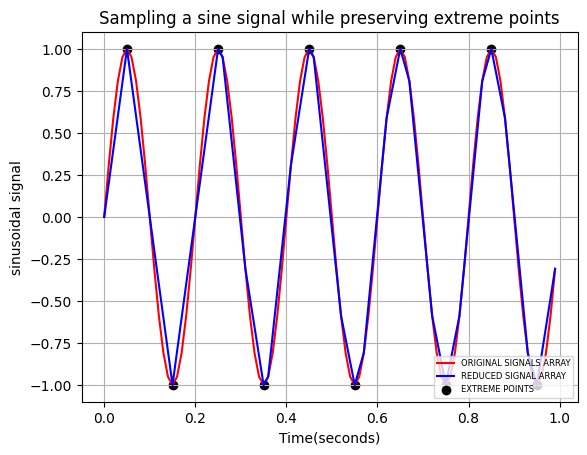

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def find_local_extrema(arr):
    # Compute the sign of the differences
    signs = np.sign(np.diff(arr))
    # Detect maxima (change from + to -)
    maxima = np.where(np.diff(signs) < 0)[0] + 1
    # Detect minima (change from - to +)
    minima = np.where(np.diff(signs) > 0)[0] + 1
    return maxima, minima

def downsample(arr): 
    # Downsample value is 20% 
    downsamp = 0.2 
    # Find downsampled length make sure the minimum is not below 1 
    size = max(int(len(arr) * downsamp), 1)
    # Find minima and maxima using the function above
    maxima, minima = find_local_extrema(arr)
    # Create new downsampled array 
    sampledarr = np.linspace(0, len(arr) - 1, size, dtype=int)
    # Create a combined array of all minima and maxima indices. make sure there are no duplicates with np.unique
    all_indices = np.unique(np.concatenate((sampledarr, maxima, minima)))
    # Return the desired array using the local extrema points, and all the local extrema points indices
    return arr[all_indices], all_indices

# Below is the code to verify the functionality of the implementation:

# Generate a time array from 0 to 1 second with a step size of 0.01 seconds (i.e., time is from 0 to 1, with 100 points).
time = np.arange(0, 1, 0.01)

# Set the frequency of the sinusoidal signal to 5 Hz (5 cycles per second).
frequency = 5  

# Create the array of sinusoidal signal using the sin function with the given frequency.
arr = np.sin(2 * np.pi * frequency * time)

# Call calculateExtreme function.
maxima, minima = find_local_extrema(arr)

# Call the function to downsample the sinusoidal signal.
sampleArr, sampleIndices = downsample(arr)

# Map the sampled indices to their corresponding time values.
newTime = time[sampleIndices]

# Print the length of the original array.
print("The length of the original array:", len(arr))

# Print the length of the sampled array.
print("The length of the sampled array:", len(sampleArr))

# Visualization:
# Plot the original signal in orange.
plt.plot(time, arr, label="ORIGINAL SIGNALS ARRAY", color='red')

# Plot the downsampled signal in blue.
plt.plot(newTime, sampleArr, label="REDUCED SIGNAL ARRAY", color='blue')
# Mark and scatter the local maxima (red points).
plt.scatter(time[maxima], arr[maxima], label="EXTREME POINTS", color='black')

# Mark and scatter the local minima (red points).
plt.scatter(time[minima], arr[minima], color='black')

# Add a title and labels to the plot.
plt.title('Sampling a sine signal while preserving extreme points')
plt.xlabel('Time(seconds)')
plt.ylabel('sinusoidal signal')

# Display the legend in the lower right corner with a font size of 6.
plt.legend(loc='lower right', fontsize=6)
# Prints squares on the screen.
plt.grid(True)
# Show the graph.
plt.show()


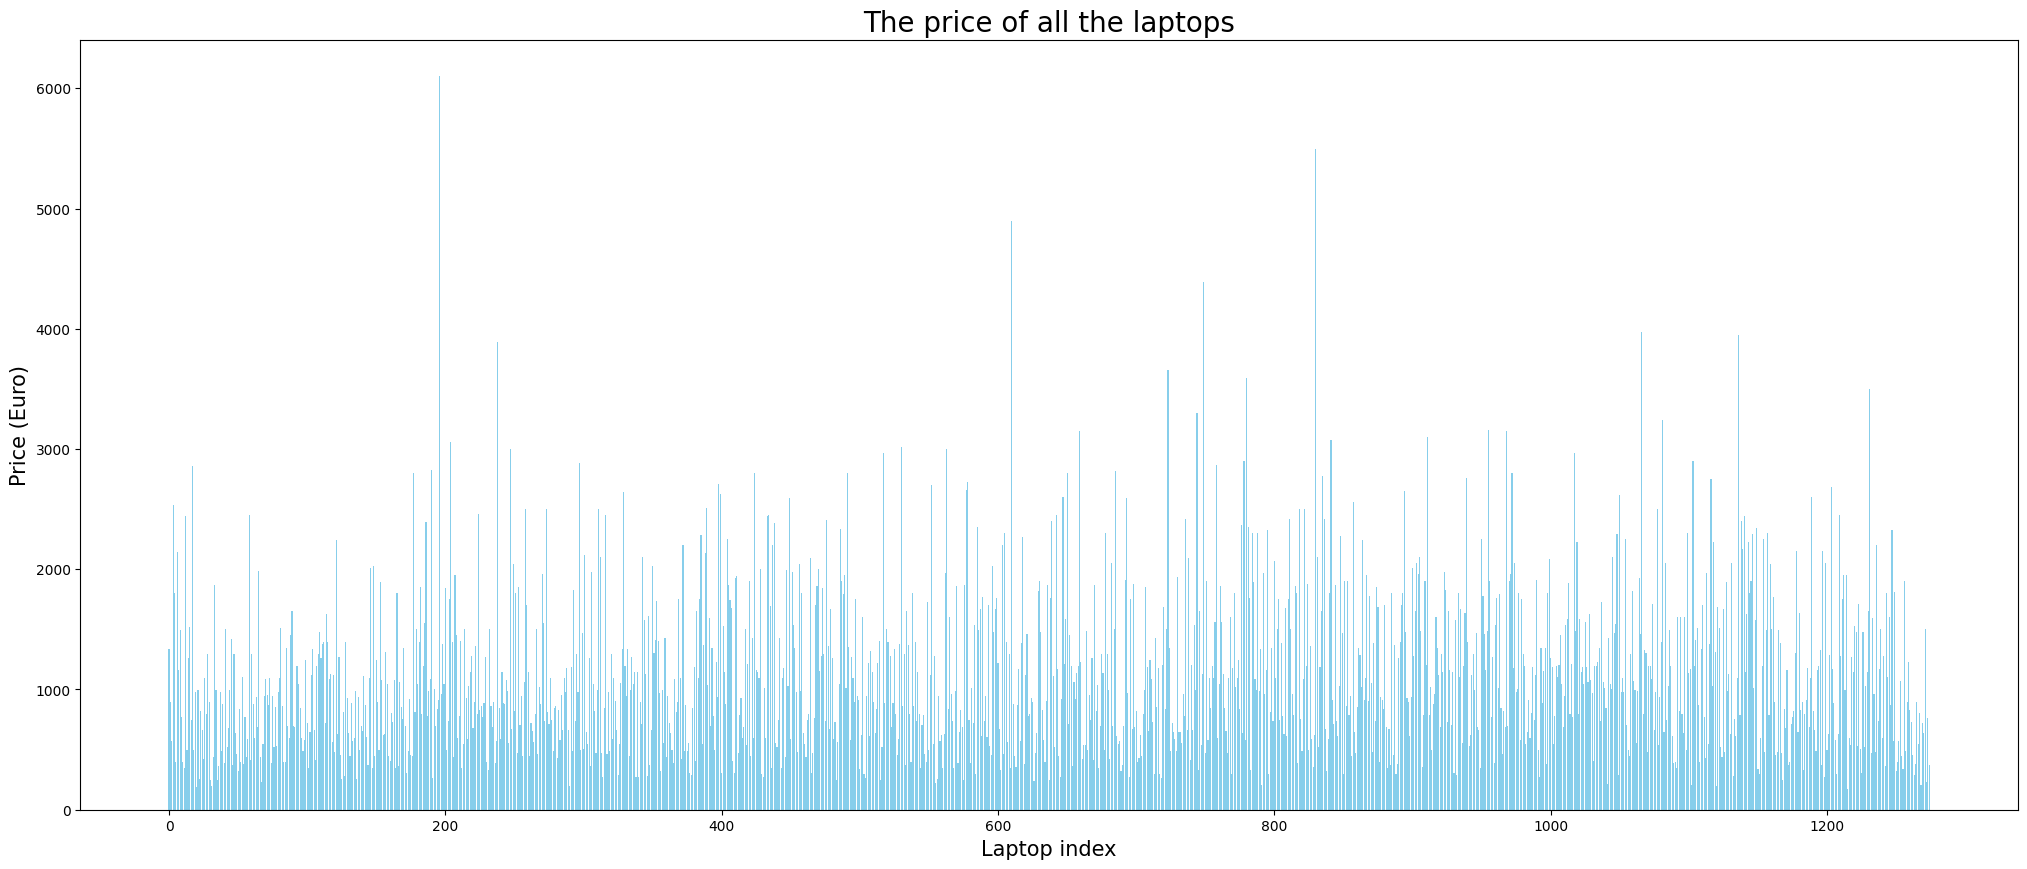

In [72]:
data = pd.read_csv('/Users/noam/Downloads/laptop_price - dataset (1).csv') 

plt.figure(figsize = (25,10))


# Choose bar plot
plt.bar(range(len(data['Price (Euro)'])), data['Price (Euro)'], color='skyblue')
# Choose title
plt.title('The price of all the laptops', fontsize=20)

# Choosing labels 
plt.xlabel('Laptop index', fontsize=15)
plt.ylabel('Price (Euro)', fontsize=15)

# Print graph
plt.show()

In [19]:


def find_and_print_avg(df):
    companies = df.groupby('Company')
    avrg_prices = companies['Price (Euro)'].mean()
    highest_mean_category = avrg_prices.idxmax()
    highest_mean = avrg_prices.max()
    print("Average price for each company: ")
    print(avrg_prices)
    print(f'The company with the highest average price is {highest_mean_category}, costing {highest_mean} on average for a laptop')

find_and_print_avg(data)


Average price for each company: 
Company
Acer          633.464455
Apple        1564.198571
Asus         1123.829737
Chuwi         314.296667
Dell         1199.225120
Fujitsu       729.000000
Google       1677.666667
HP           1080.314664
Huawei       1424.000000
LG           2099.000000
Lenovo       1093.862215
MSI          1728.908148
Mediacom      295.000000
Microsoft    1612.308333
Razer        3346.142857
Samsung      1413.444444
Toshiba      1267.812500
Vero          217.425000
Xiaomi       1133.462500
Name: Price (Euro), dtype: float64
The company with the highest average price is Razer, costing 3346.1428571428573 on average for a laptop


In [24]:
# Check for all the uniqe strings in the data, make it a list for iteration perpuses
unique_strings = data['OpSys'].unique().tolist()

# Print each unique string
print("Unique strings in the column:")
for string in unique_strings:
    print(string)

Unique strings in the column:
Mac
No OS
Windows
Linux
Android
Chrome OS


In [ ]:
def update(df):
    os_replace = {
        'Windows 10': 'Windows',
        'Windows 10 S': 'Windows',
        'Windows 7': 'Windows',
        'macOS': 'Mac',
        'Mac OS X': 'Mac'
    }
    
    # Use the replace function on the 'OpSys' column and save it locally 
    df['OpSys'] = df['OpSys'].replace(os_replace)
    df.to_csv('/Users/noam/Documents/Result/changed.csv', index=False)
    return df
update (data)
# Use a diffrent variable for new data 
new_data = pd.read_csv('/Users/noam/Documents/Result/changed.csv')
# Check for all the uniqe strings in the new data
unique_strings = new_data['OpSys'].unique().tolist()

# Print each unique string
print("Unique strings in the column:")
for string in unique_strings:
    print(string)

Unique strings in the column:
Mac
No OS
Windows
Linux
Android
Chrome OS


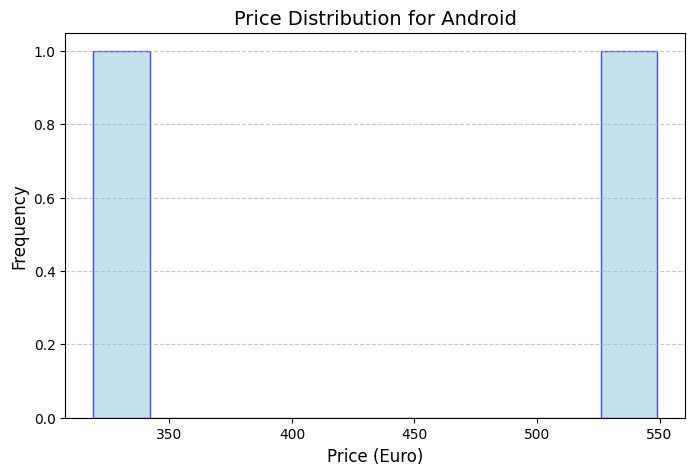

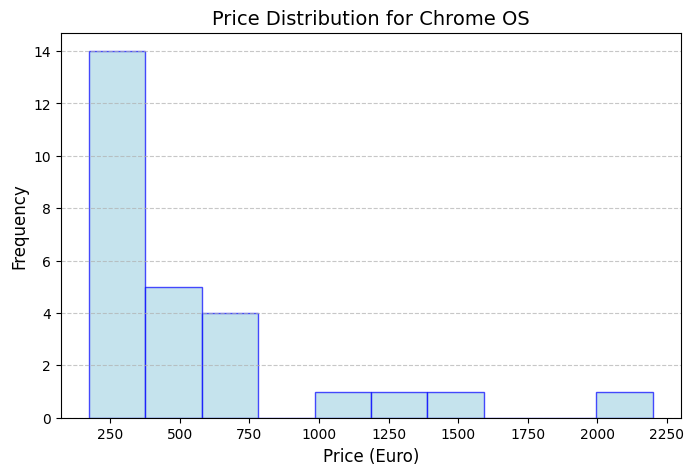

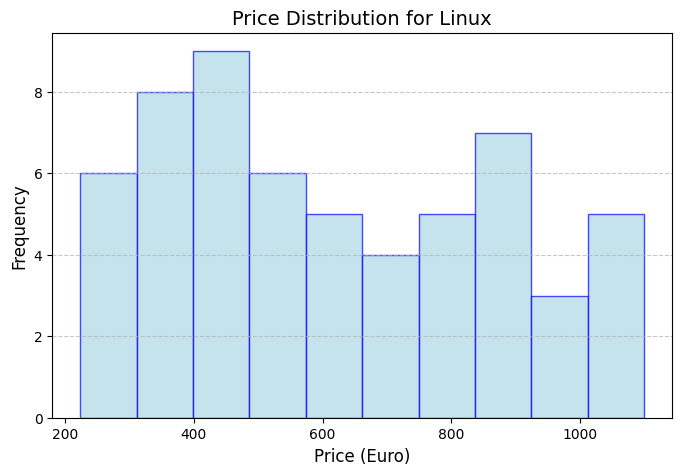

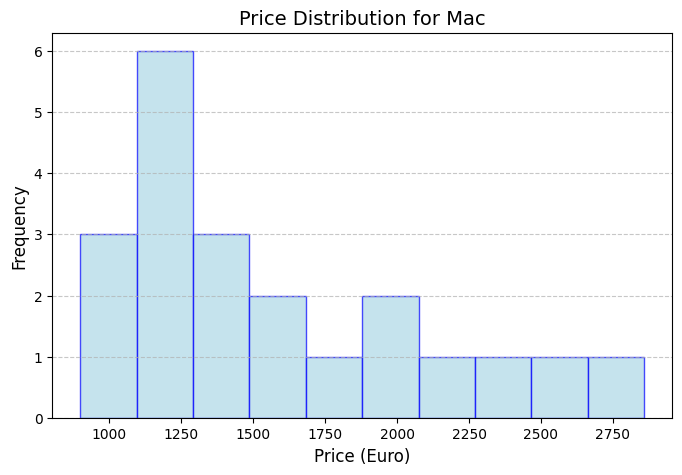

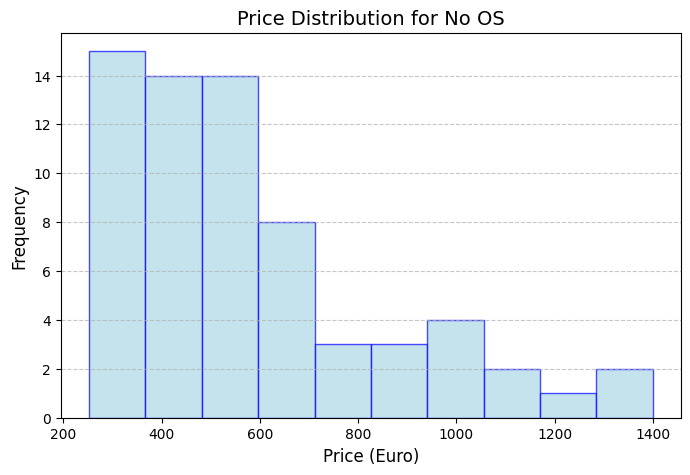

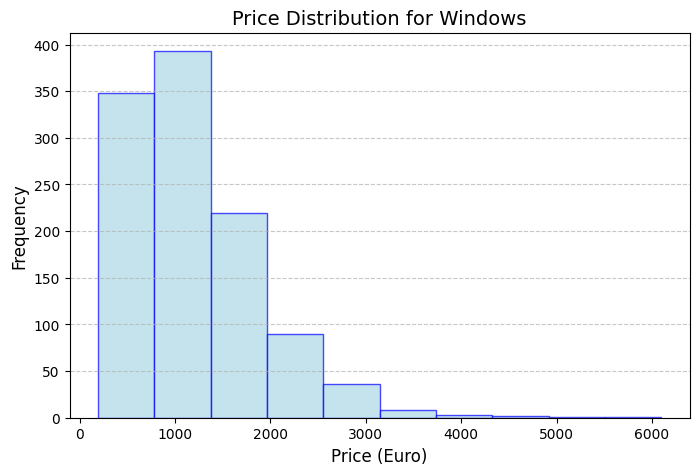

In [32]:
new_data.groupby('OpSys')['Price (Euro)'].apply(list)
# Convert the result to a dictionary for easier display
os_prices = new_data.groupby('OpSys')['Price (Euro)'].apply(list)
os_prices_dict = os_prices.to_dict()

for os_name, prices in os_prices_dict.items():
    plt.figure(figsize=(8, 5))
    plt.hist(prices, bins=10, color='lightblue', edgecolor='blue', alpha=0.7)
    
    # Add title and labels
    plt.title(f"Price Distribution for {os_name}", fontsize=14)
    plt.xlabel("Price (Euro)", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Show the plot
    plt.show()

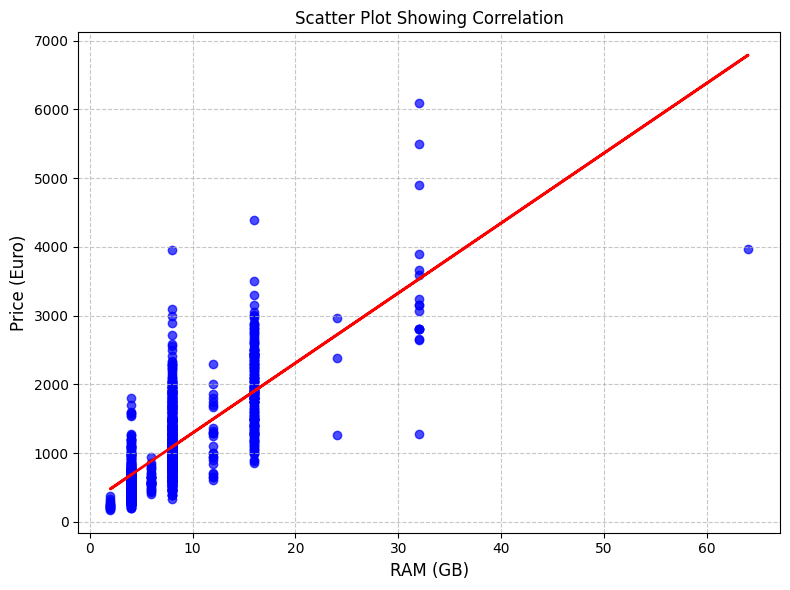

Correlation Coefficient: 0.74028652716227


In [42]:


# Set both  variables
RAM = new_data['RAM (GB)']
price = new_data['Price (Euro)']

# Use the .corr function built into pandas to measure the correlation
correlation = RAM.corr(price)
# The np.polyfit built into numpy gets the slope(m) and the intercept(b) of the linear line tracking the
# Change of the price as a function of the RAM. I chose 1 as the degree of the poliminal for a linear regession
slope, intercept = np.polyfit(RAM, price, 1)
# Standard linear equation (mx + b) 
trend_line = slope * RAM + intercept
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(RAM, price, alpha=0.7, color='blue')

# Add titles and labels
plt.title(f"Scatter Plot Showing Correlation")
plt.xlabel('RAM (GB)', fontsize=12)
plt.ylabel('Price (Euro)', fontsize=12)
# Add the linear regression line on top of the scatterplot 
plt.plot(RAM, trend_line, color='red', linewidth=2, label=f'Trend Line (r={correlation:.2f})')

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()
# Print the correlation coefficient to show how reliable is the linear regression line
print(f"Correlation Coefficient: {correlation}")

In [63]:

def extract_storage(df): 
    unclean_memory = df["Memory"].tolist()  # Convert the 'Memory' column to a list
    cleaned_memory = []  # Store the cleaned values

    for memory in unclean_memory: 
        memory_parts = memory.split()  # Split the string into parts
        filtered_parts = []  # Create an empty list to hold filtered parts

        for part in memory_parts:
            if "GB" not in part and "TB" not in part:  # If the part does not contain "GB", add it to the filtered list
                filtered_parts.append(part)
        
        cleaned_memory.append(' '.join(filtered_parts))  # Add the cleaned list of parts to the result


    df['Storage type'] = cleaned_memory
    df.to_csv('/Users/noam/Documents/Result/changed.csv', index=False)

extract_storage(new_data)
new_data_with_storage = pd.read_csv('/Users/noam/Documents/Result/changed.csv')
print(new_data_with_storage)

     Company                              Product            TypeName  Inches  \
0      Apple                          MacBook Pro           Ultrabook    13.3   
1      Apple                          Macbook Air           Ultrabook    13.3   
2         HP                               250 G6            Notebook    15.6   
3      Apple                          MacBook Pro           Ultrabook    15.4   
4      Apple                          MacBook Pro           Ultrabook    13.3   
...      ...                                  ...                 ...     ...   
1270  Lenovo                       Yoga 500-14ISK  2 in 1 Convertible    14.0   
1271  Lenovo                       Yoga 900-13ISK  2 in 1 Convertible    13.3   
1272  Lenovo                   IdeaPad 100S-14IBR            Notebook    14.0   
1273      HP  15-AC110nv (i7-6500U/6GB/1TB/Radeon            Notebook    15.6   
1274    Asus  X553SA-XX031T (N3050/4GB/500GB/W10)            Notebook    15.6   

                           

In [ ]:
# Bonus Question 
# List of questions: 
"""
1. How the computer type affect the cpu prequency 
2. How each company price thier laptops compared to what specs they offer (create a specs formula and divide it by cost)
3. Which company sells the heaviest laptops
4. Which CPU type is the most expansive by average 
I chose to implement the first and second question 
 """


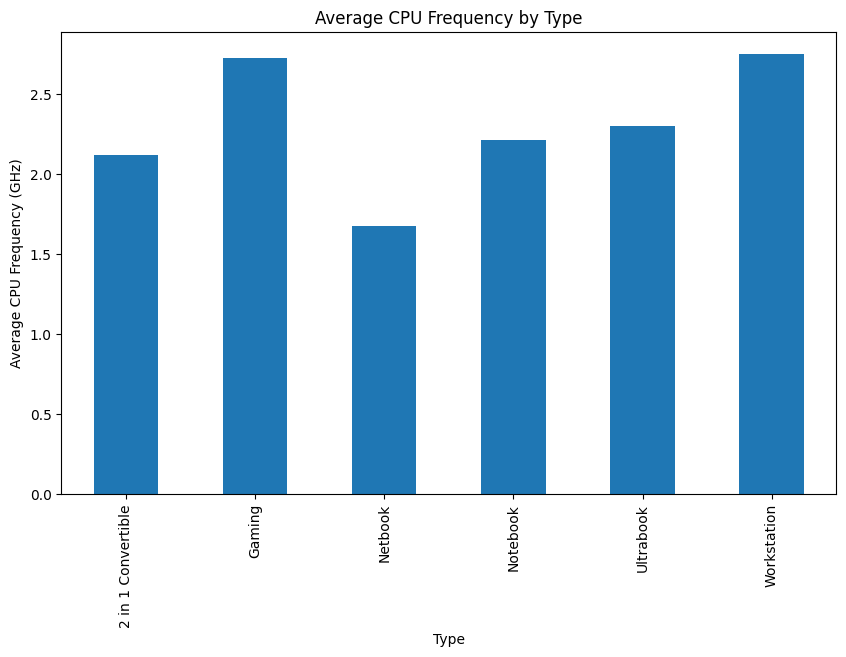

In [84]:
# Question two 
# Set both  variables
com_type = new_data['TypeName']
CPU_preq = new_data['CPU_Frequency (GHz)']
# Group data
groupby_type = new_data.groupby('TypeName')['CPU_Frequency (GHz)']
# Create avraged list
average_cpu_freq = groupby_type.mean()
# Create plot 
average_cpu_freq.plot(kind='bar', figsize=(10, 6))
plt.title('Average CPU Frequency by Type')
plt.xlabel('Type')
plt.ylabel('Average CPU Frequency (GHz)')
# Show the plot
plt.show()



The CPU type with the highest average price is 'Xeon E3-1535M v6' with an average price of 4899.00 Euros.


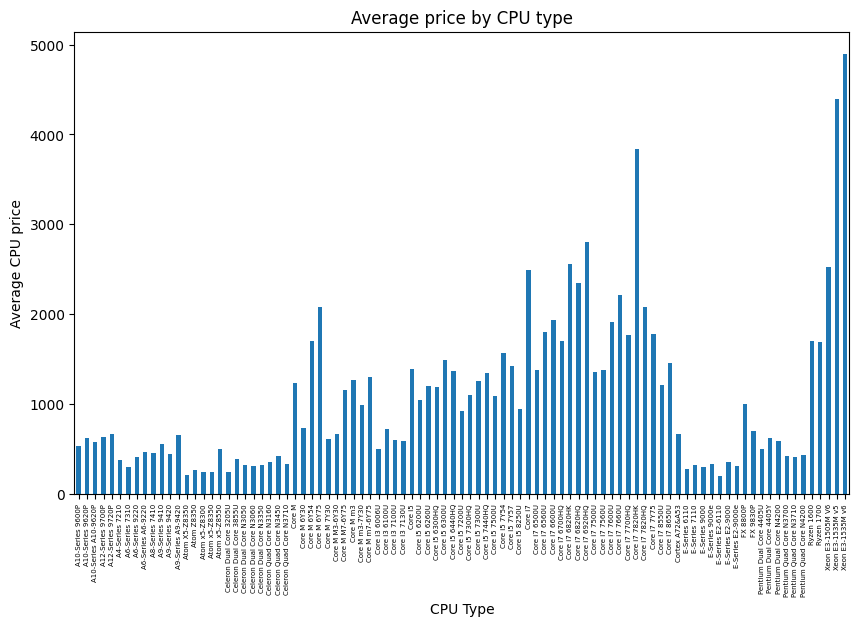

In [ ]:
# Question four 
# Set both  variables
CPU_type = new_data['CPU_Type']
CPU_price = new_data['Price (Euro)']
# Group data
groupby_cpu_type = new_data.groupby('CPU_Type')['Price (Euro)']
# Calculate avrage price for each group
average_cpu_price = groupby_cpu_type.mean()
# Create plot 
average_cpu_price.plot(kind='bar', figsize=(10, 6))
plt.title('Average price by CPU type')
plt.xlabel('CPU Type')
plt.ylabel('Average CPU price')
plt.xticks(fontsize=5)
# Find the group with the highest average price
highest_avg_group = average_cpu_price.idxmax()
highest_avg_value = average_cpu_price.max()

# Print the result
print(f"The CPU type with the highest average price is '{highest_avg_group}' with an average price of {highest_avg_value:.2f} Euros for a leptop comtaining it.")


